# Seattle Airbnb Data Analysis

This analysis following the CRISP-DM process is part of the Udacity Data Scientist Nanodegree Program. The available data is part of the Airbnb Inside initiative, and describes the listing activity of homestays in Seattle, USA, in 2015.

In [1]:
# import statements
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## 1. Business Understanding

The analysis will be based around the following three questions:
- Q_I: How does the time of the year influence the price of listings?
- Q_II: How does the location influence the price of listings?
- Q_III: How big is the discount for weekly and montly prices?

All those questions are relevant esspecailly relevant to Airbnb hosts. Hosts can better estimate a good but reasonable price for their property and get better insights how this price is determined on the market.

## 2. Data Unerstanding

The following Airbnb activity is included in this Seattle dataset:
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

In [2]:
#read in data calendar data
calendar = pd.read_csv('seattle_airbnb_data/calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
calendar.shape

(1393570, 4)

In [4]:
#read in data listings data
listings = pd.read_csv('seattle_airbnb_data/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
#explore the listings dataset deeper due to its great size
listings.shape

(3818, 92)

In [6]:
listings.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,...,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,...,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/6412858,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,...,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.452245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.946307,2.078919
std,2.962660e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.750259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.893029,1.822348
min,3.335000e+03,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.020000
25%,3.258256e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.695000
50%,6.118244e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.540000
75%,8.035127e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000


In [7]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [8]:
#prices 
listings[['price', 'weekly_price', 'monthly_price']]

,price,weekly_price,monthly_price
0,$85.00,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00"
2,$975.00,NaN,NaN
3,$100.00,$650.00,"$2,300.00"
4,$450.00,NaN,NaN
...,...,...,...
3813,$359.00,NaN,NaN
3814,$79.00,NaN,NaN
3815,$93.00,$450.00,NaN
3816,$99.00,NaN,NaN


In [9]:
# data avaiavle for the different neighbourhoods
listings.groupby(['neighbourhood_cleansed'])['neighbourhood_cleansed'].count()

neighbourhood_cleansed
Adams                70
Alki                 42
Arbor Heights         5
Atlantic             53
Belltown            234
                   ... 
West Woodland        64
Westlake             17
Whittier Heights     26
Windermere           10
Yesler Terrace       17
Name: neighbourhood_cleansed, Length: 87, dtype: int64

In [10]:
#read in data listings data
reviews = pd.read_csv('seattle_airbnb_data/reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## 3. Prepare Data

### 3.1 Prepare data for Q_I How does the time of the year influence the price of listings?

In [11]:
#convert price column in 'calendar' to float (remove the dollar sign for that)
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [12]:
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

In [13]:
#split year / month / day in seperate colums
calendar['year'] = pd.to_datetime(calendar['date']).dt.year
calendar['month'] = pd.to_datetime(calendar['date']).dt.month
calendar['day'] = pd.to_datetime(calendar['date']).dt.day

In [14]:
calendar.groupby(['year'])['year'].count() 

year
2016    1385934
2017       7636
Name: year, dtype: int64

In [15]:
#there is also data from 2017 (-> filter for 2016) and price has nan values (removen nan values)
calendar_Q1 = calendar[calendar['price'].notnull()]
calendar_Q1 = calendar_Q1[calendar_Q1['year']==2016]

In [16]:
#remove not needed columns
calendar_Q1 = calendar_Q1[['listing_id','price','month']]
calendar_Q1.head()

,listing_id,price,month
0,241032,85.0,1
1,241032,85.0,1
9,241032,85.0,1
10,241032,85.0,1
14,241032,85.0,1


### 3.2 Prepare data for Q_III: How does the location influence the price of listings?

In [17]:
#convert price column in 'listings' to float (remove the dollar sign for that) 
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

In [18]:
listings_Q2 = listings[['price','neighbourhood_cleansed']]
listings_Q2.isnull().sum() #no data is missing

price                     0
neighbourhood_cleansed    0
dtype: int64

In [19]:
listings_Q2.head()

,price,neighbourhood_cleansed
0,85.0,West Queen Anne
1,150.0,West Queen Anne
2,975.0,West Queen Anne
3,100.0,West Queen Anne
4,450.0,West Queen Anne


### 3.3 Prepare data for Q_III: How big is the discount for weekly and montly prices?

In [20]:
#convert 'weekly_price' and 'monthly_price' column in 'listings' to float (remove the dollar sign for that) 
listings['weekly_price'] = listings['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
listings['monthly_price'] = listings['monthly_price'].replace('[\$,]', '', regex=True).astype(float)

In [21]:
listings_Q3 = listings[['id','price']]#, 'weekly_price', 'monthly_price']]
listings[['id','price', 'weekly_price', 'monthly_price']].count()
# not all listings have weekly or montly prices

id               3818
price            3818
weekly_price     2009
monthly_price    1517
dtype: int64

In [22]:
listings[['id','price', 'weekly_price', 'monthly_price']].head()

,id,price,weekly_price,monthly_price
0,241032,85.0,NaN,NaN
1,953595,150.0,1000.0,3000.0
2,3308979,975.0,NaN,NaN
3,7421966,100.0,650.0,2300.0
4,278830,450.0,NaN,NaN


In [23]:
# fill missing values by price times seven (seven days per week)
weekly_price_filled = listings['weekly_price'].fillna(listings['price']*7)
listings_Q3 = listings_Q3.join(weekly_price_filled)

In [24]:
# fill missing values by weekly price times 52/12 (52 weeks in 12 months)
montly_price_filled = listings['monthly_price'].fillna(listings_Q3['weekly_price']*52/12.0)
listings_Q3 = listings_Q3.join(montly_price_filled)

In [25]:
# calculate prices without discount for comparison
weekly_price_no_discount = listings_Q3['price']*7 #7days per week
listings_Q3.loc[:,'weekly_price_no_discount'] = weekly_price_no_discount
monthly_price_no_discount = listings_Q3['price']*7*52/12.0 #7days per week, 52 weeks per year, 12 month per year
listings_Q3.loc[:,'monthly_price_no_discount'] = monthly_price_no_discount

In [26]:
listings_Q3.loc[:,'weekly_discount_rate'] = listings_Q3['weekly_price']/listings_Q3['weekly_price_no_discount']

In [27]:
listings_Q3.loc[:,'monthly_discount_rate'] = listings_Q3['monthly_price']/listings_Q3['monthly_price_no_discount']

In [28]:
#create bins and bis_lanbls for more meaningful grouping and plot
bin_size = 100
bins = (listings_Q3['price']/bin_size).astype(int)
# limit bin numbers to ten
bins[bins>9] = 10
listings_Q3['bins'] = bins.astype(int)
#prepare meaningful labels for plot
bin_labels ={0: 'price<100',1: '100<=price<200',2: '200<=price<300',3: '300<=price<400',
         4: '400<=price<500',5: '500<=price<600',6: '600<=price<700',7: '700<=price<800',
         8: '800<=price<900',9: '800<=price<900',10: '1000<=price'}
listings_Q3.sort_values(by='bins',ascending=True,inplace=True)

In [29]:
listings_Q3.head()

,id,price,weekly_price,monthly_price,weekly_price_no_discount,monthly_price_no_discount,weekly_discount_rate,monthly_discount_rate,bins
0,241032,85.0,595.0,2578.333333,595.0,2578.333333,1.000000,1.000000,0
2236,2721575,95.0,595.0,2578.333333,665.0,2881.666667,0.894737,0.894737,0
2237,1738425,72.0,329.0,1199.000000,504.0,2184.000000,0.652778,0.548993,0
2239,6078382,55.0,385.0,2700.000000,385.0,1668.333333,1.000000,1.618382,0
2240,7585688,65.0,375.0,1350.000000,455.0,1971.666667,0.824176,0.684700,0


## 4. Data Modeling

### 4.1 model data for Q_I: How does the time of the year influence the price of listings?

In [30]:
#get median price per listing and month
price_per_id_and_month = calendar_Q1.groupby(['listing_id','month'])['price'].median().unstack()
#only consinder listings, that have at least one price for each month
price_per_id_and_month.dropna(inplace=True)
price_per_id_and_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
listing_id,,,,,,,,,,,,
4291,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0
5682,50.0,54.0,53.0,53.0,56.0,60.0,60.0,60.0,50.0,48.0,48.0,48.0
6606,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0
9419,70.0,70.0,70.0,70.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0
9596,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0


### 4.2 model data for Q_II: How does the location influence the price of listings?

In [31]:
price_per_id_and_location = listings_Q2.groupby('neighbourhood_cleansed').median()
price_per_id_and_location.sort_values(by='price',ascending=False,inplace=True)
price_per_id_and_location.head()

,price
neighbourhood_cleansed,
Briarcliff,173.5
Pioneer Square,150.0
Westlake,150.0
Industrial District,150.0
Southeast Magnolia,150.0


### 4.3 model data for Q_III: How big is the discount for weekly and montly prices?

In [32]:
weekly_discount_by_price = listings_Q3.groupby(['bins'])['weekly_discount_rate'].median()
#weekly_discount_by_price['bins_labels'] = weekly_discount_by_price['bins'].map(labels)
weekly_discount_by_price.head()

bins
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: weekly_discount_rate, dtype: float64

In [33]:
#use label names instead of bin numbers
weekly_discount_by_price = weekly_discount_by_price.rename(index=bin_labels)
weekly_discount_by_price.head()

bins
price<100         1.0
100<=price<200    1.0
200<=price<300    1.0
300<=price<400    1.0
400<=price<500    1.0
Name: weekly_discount_rate, dtype: float64

In [34]:
monthly_discount_by_price = listings_Q3.groupby(['bins'])['monthly_discount_rate'].median()
monthly_discount_by_price.head()

bins
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: monthly_discount_rate, dtype: float64

In [35]:
#use label names instead of bin numbers
monthly_discount_by_price = monthly_discount_by_price.rename(index=bin_labels)
monthly_discount_by_price.head()

bins
price<100         1.0
100<=price<200    1.0
200<=price<300    1.0
300<=price<400    1.0
400<=price<500    1.0
Name: monthly_discount_rate, dtype: float64

## 5. Evaluate the Results

### 5.1 evaluate results for Q_I How does the time of the year influence the price of listings?

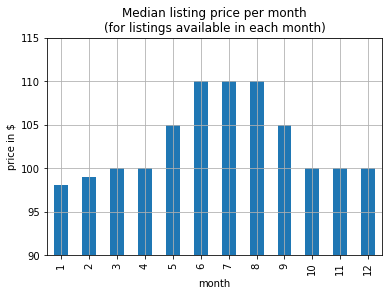

In [36]:
# plot median price per month
price_per_id_and_month.median().plot(kind='bar')
plt.title('Median listing price per month\n(for listings available in each month)')
plt.grid(True)
plt.ylabel('price in $')
plt.ylim((90,115))
plt.savefig('plots/plot_Q1_median_price_per_month.png', dpi=600)

### 5.2 evaluate results for Q_II: How does the location influence the price of listings?

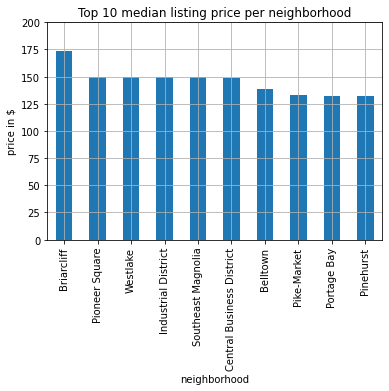

In [37]:
# plot top 10 median prices
price_per_id_and_location.head(10).plot(kind='bar',legend=None)
plt.title('Top 10 median listing price per neighborhood')
plt.xlabel('neighborhood')
plt.grid(True)
plt.ylabel('price in $')
plt.ylim((0,200))
#plt.tight_layout()
plt.savefig('plots/plot_Q2_top10_median_prices_per_neighborhood.png', dpi=600, bbox_inches="tight")

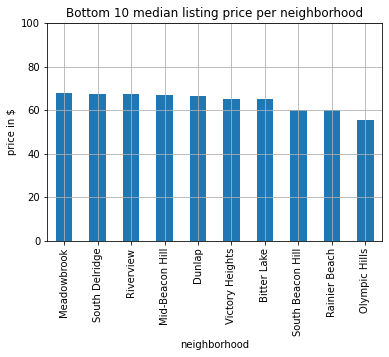

In [38]:
# plot bottom 10 median prices
price_per_id_and_location.tail(10).plot(kind='bar',legend=None)
plt.title('Bottom 10 median listing price per neighborhood')
plt.xlabel('neighborhood')
plt.grid(True)
plt.ylabel('price in $')
plt.ylim((0,100))
plt.savefig('plots/plot_Q2_bottom10_median_prices_per_neighborhood.png', dpi=600, bbox_inches="tight")

### 5.3 evaluate results for Q_III: How big is the discount for weekly and montly prices?

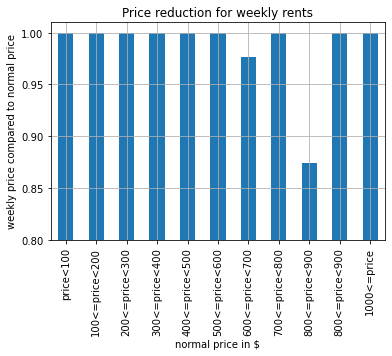

In [39]:
#plot discount for weekly rents
weekly_discount_by_price.plot(kind='bar')
plt.title('Price reduction for weekly rents')
plt.xlabel('normal price in $')
plt.ylabel('weekly price compared to normal price')
plt.grid(True)
plt.ylim([0.8, 1.01])
plt.yticks(np.arange(0.8,1.01,0.05))
plt.savefig('plots/plot_Q3_price_reduction_for_weekly_rents.png', dpi=600, bbox_inches="tight")

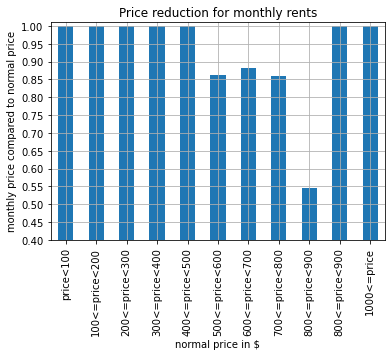

In [40]:
#plot discount for monthly rents
monthly_discount_by_price.plot(kind='bar')
plt.title('Price reduction for monthly rents')
plt.xlabel('normal price in $')
plt.ylabel('monthly price compared to normal price')
plt.grid(True)
plt.ylim([0.4, 1.01])
plt.yticks(np.arange(0.4,1.01,0.05))
plt.savefig('plots/plot_Q3_price_reduction_for_monthly_rents.png', dpi=600, bbox_inches="tight")

## 6. Deploy

In [41]:
#upload fiels and code to github, write article